# A/B Testing Research Proposal: Does Increasng the Department of Defense's Investment (in dollars) Decrease Suicide Attacks and Casualties?

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

suicideDB = pd.read_csv('C://duh/Thinkful/ResearchProposal/Suicide_Attack_Database.csv')
defense_investmentDB = pd.read_csv('C://duh/Thinkful/ResearchProposal/Defense_Investment_by_year.csv', header=2, na_values='TQ')[:79]
agency_spendingDB = pd.read_csv('C://duh/Thinkful/ResearchProposal/US_Spending_by_Agency.csv', header=1)[:36]
terror_incidentsDB = pd.read_csv('C://duh/Thinkful/ResearchProposal/RAND_Database_of_Worldwide_Terrorism_Incidents.csv')

defense_investmentDB['Department of Defense - Military Total'] = defense_investmentDB['Department of Defense - Military Total'].str.replace(',', '')
defense_investmentDB['Fiscal Year'] = defense_investmentDB['Fiscal Year'].str.replace(' estimate', '')
defense_investmentDB['Department of Defense - Military Total'] = pd.to_numeric(defense_investmentDB['Department of Defense - Military Total'])
defense_investmentDB['Fiscal Year'] = pd.to_numeric(defense_investmentDB['Fiscal Year'])
terror_incidentsDB['Date'] = pd.to_datetime(terror_incidentsDB['Date'])

suicideDB = suicideDB.drop('attack_id', axis=1)

suicideDB.groupby(['location_names', 'campaign_name']).sum()
suicideDB['total_attacked'] = suicideDB['number_killed'] + suicideDB['number_wounded']
suicide_campaign = suicideDB.where(suicideDB['campaign_name'].str.contains('U.S. & Allies')).dropna()
suicide_campaign['attack_date'] = pd.to_datetime(suicide_campaign['attack_date']).dt.year

terror_incidentsDB.Date = terror_incidentsDB.Date.dt.year
terror_incidentsDB['Total Attacked'] = terror_incidentsDB.Injuries + terror_incidentsDB.Fatalities
terror_incidents_2000 = terror_incidentsDB.where(terror_incidentsDB.Date > 2000).dropna().groupby('Date').sum()

suicide_campaign_year = suicide_campaign.groupby(['attack_date']).sum()
suicide_campaign_campaign = suicide_campaign.groupby('campaign_name').sum()
suicide_campaign_campaign = suicide_campaign_campaign.drop('attack_date', axis=1)

defense_investment_2000 = defense_investmentDB.where(defense_investmentDB['Fiscal Year'] > 2000).where(defense_investmentDB['Fiscal Year'] < 2010).dropna().groupby('Fiscal Year').sum()

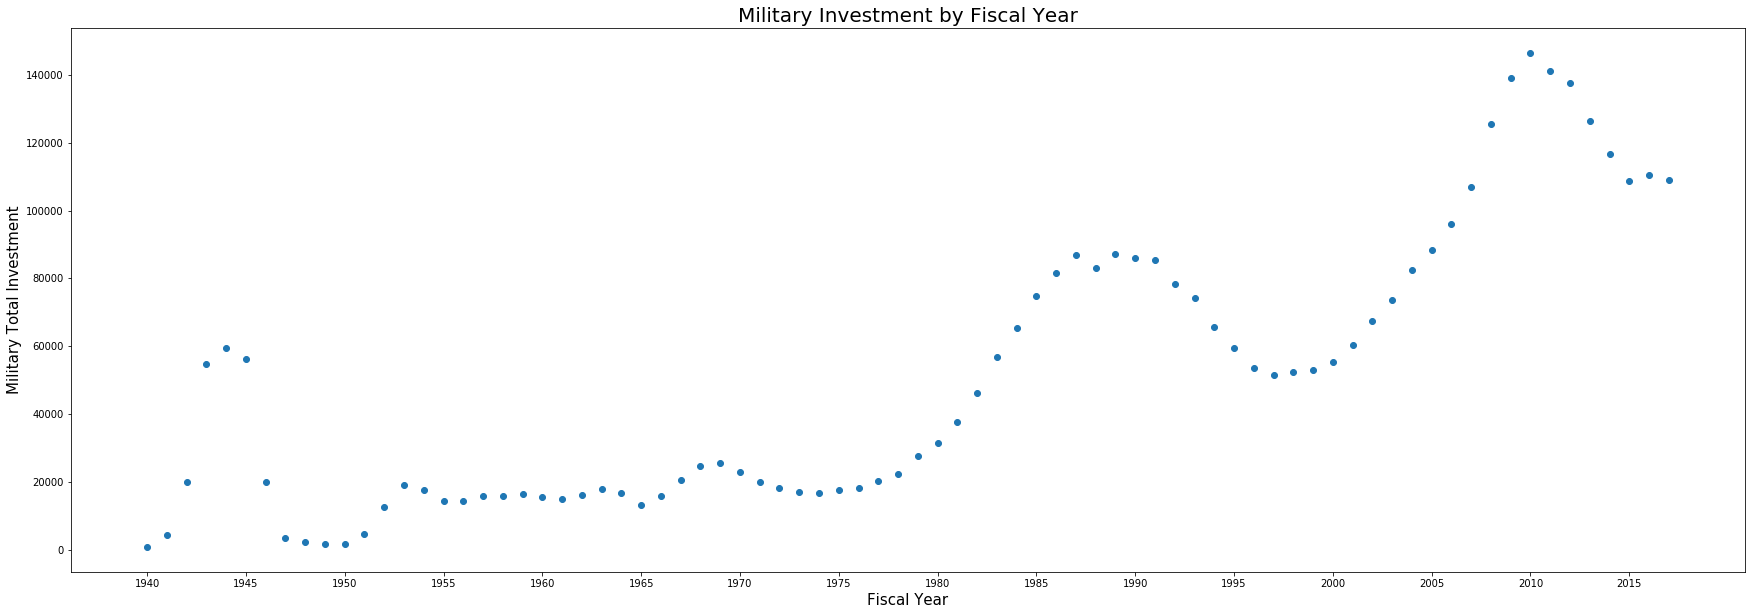

In [2]:
plt.figure(figsize=(30,10))
plt.scatter(y=defense_investmentDB['Department of Defense - Military Total'], x=defense_investmentDB['Fiscal Year'])
plt.xticks([1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])
plt.title('Military Investment by Fiscal Year', size=20)
plt.xlabel('Fiscal Year', size=15)
plt.ylabel('Military Total Investment', size=15)
plt.show()

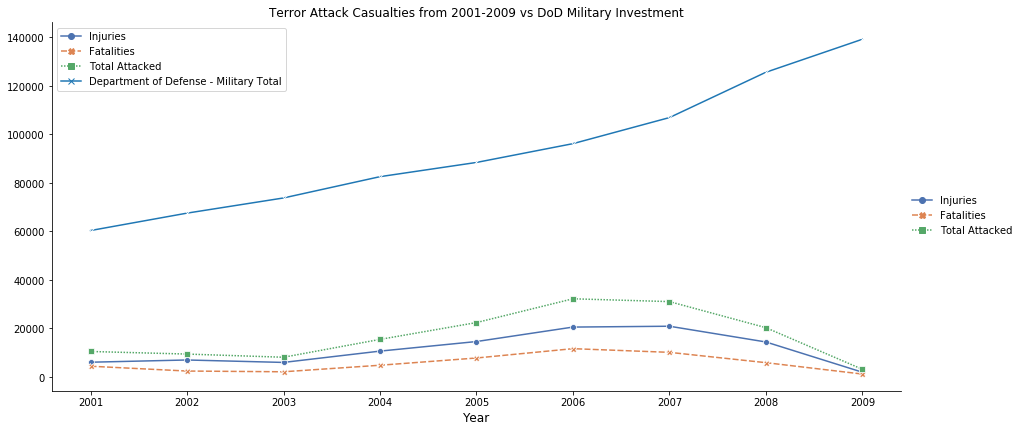

In [3]:
sns.relplot(kind='line', data=terror_incidents_2000, hue='injuries', palette='deep', markers=True, height=5.7, aspect=12.7/5.7)
#sns.lineplot(data=terror_incidents_2000, height=5.7, aspect=11.7/5.7, legend=False)
sns.lineplot(data=defense_investment_2000, markers='x')
plt.title('Terror Attack Casualties from 2001-2009 vs DoD Military Investment')
plt.xlabel('Year', size=12)
plt.show()

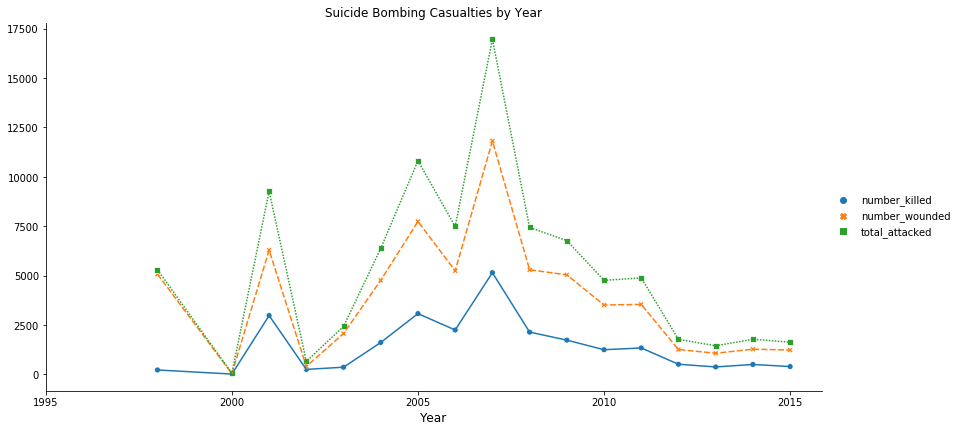

In [4]:
sns.relplot(data=suicide_campaign_year, height=5.7, aspect=11.7/5.7)
sns.lineplot(data=suicide_campaign_year, legend=False)
plt.xticks([1995, 2000, 2005, 2010, 2015])
plt.title('Suicide Bombing Casualties by Year')
plt.xlabel('Year', size=12)
plt.show()

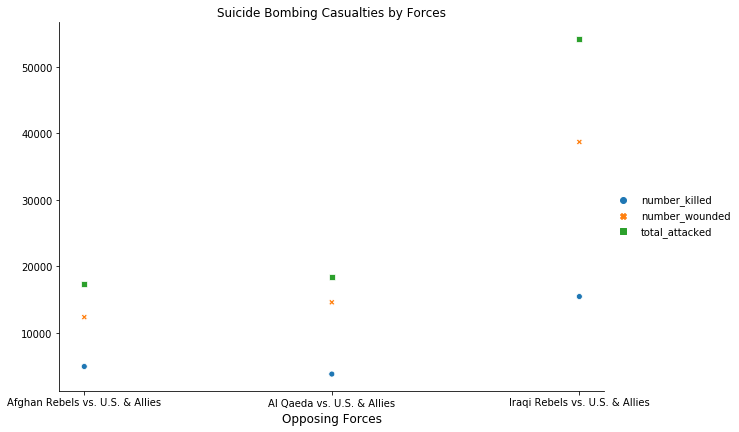

In [5]:
sns.relplot(data=suicide_campaign_campaign, height=5.7, aspect=8.7/5.7)
plt.title('Suicide Bombing Casualties by Forces')
plt.xlabel('Opposing Forces', size=12)
plt.show()

## Determining the Problem



With the United States military continues to perform peace-keeping missions over seas against terrorist networks, suicide bombing pose a threat for the armed forces. Suicide bombings have resulted in large casualty counts and destruction. Iraq had the largest total casualties for the US military and allies. From 2001 to 2009, the Department of Defense continuously increased their total investments. During this period, the number of terror attacks and casualties declined.

## Presenting the Possible Solution

By increasing the Department of Defense's investments, a reduction of terror attacks and suicide bombing will decrease.

## Method of Testing

Increase the investment allowance by 2x in Iraq over the next 12-24 months and record the number of suicide bombings and casualty counts. The variable of interest is the reduction of attacks by terrorist networks. This is an A/B manipulation where investments are increased or maintained.

We will compute the reduction in suicide bombing during the study and compare the results with the previously collected data. 

If suicide bombings are reduced by 2 stand deviations or greater, we will increase investments in all countries of concern. If there is no reduction in suicide bombings, or the reduction is within 1 standard deviation, the investments will return to the standard operating expenditure and alternate studies will be performed.